In [1]:
from os import path
import pickle

import astropy.coordinates as coord
from astropy.table import Table
import astropy.units as u
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#plt.style.use('apw-notebook')
%matplotlib inline
import sqlutil
from scipy.stats import binned_statistic_dd
import testXD
from dustmaps.sfd import SFDQuery
from astropy.coordinates import SkyCoord
import astropy.units as units

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20

In [2]:
def queryDatabase(query, columns, post_query, cache_file='db.pickle'):

    #cache_file = "reducedPM2.pickle"

    if not path.exists(cache_file):
        res = sqlutil.get(query.format(','.join(columns), post_query),
                          db='wsdb', host='cappc127.ast.cam.ac.uk', 
                          user='gaia_sprint', password='NOT@Gaia_sprint', 
                          asDict=True)

        with open(cache_file, "wb") as f:
            pickle.dump(res, f)
        
    else:
        with open(cache_file, "rb") as f:
            res = pickle.load(f)
    return res

In [3]:
def dust(l, b):
    c = SkyCoord(l, b, frame='galactic')
    sfd = SFDQuery()
    dust = sfd(c)
    return dust

In [4]:
def reducedPM(pmra, pmdec, mag):
    pm = np.sqrt(pmra**2. + pmdec**2.)
    return mag + 5.*np.log10(pm) + 5.

In [5]:
dustCoeff = {'B': 3.626,
             'V': 2.742,
             'g': 3.303,
             'r': 2.285,
             'i': 1.698,
             'J': 0.709,
             'H': 0.449,
             'K': 0.302,
             'G': 2.55}

In [6]:
columns = '*'
query = "Select {0} FROM gaia_dr1.gaia_source {1}"
cuts = 'LIMIT 10'
res = queryDatabase(query, columns, cuts, cache_file='gaiaListColumns')
tbl = Table(res)
tbl.keys()

['solution_id',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_good_obs_ac',
 'astrometric_n_bad_obs_al',
 'astrometric_n_bad_obs_ac',
 'astrometric_delta_q',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_primary_flag',
 'astrometric_relegation_factor',
 'astrometric_weight_al',
 'astrometric_weight_ac',
 'astrometric_priors_used',
 'matched_observations',
 'duplicated_source',
 'scan_direction_strength_k1',
 'scan_direction_strength_k2',
 'scan_direction_strength_k3',
 'scan_direction_strength_k4',
 'scan_direction_mean_k1',
 'scan_direction_mean_

In [7]:
columns = '*'
query = "Select {0} FROM gaia_dr1_aux.gaia_source_sdssdr9_xm_new {1}"
cuts = "LIMIT 10"
res = queryDatabase(query, columns, cuts, cache_file='sdssListColumns')
tbl = Table(res)
tbl.keys()

['solution_id',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_good_obs_ac',
 'astrometric_n_bad_obs_al',
 'astrometric_n_bad_obs_ac',
 'astrometric_delta_q',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_primary_flag',
 'astrometric_relegation_factor',
 'astrometric_weight_al',
 'astrometric_weight_ac',
 'astrometric_priors_used',
 'matched_observations',
 'duplicated_source',
 'scan_direction_strength_k1',
 'scan_direction_strength_k2',
 'scan_direction_strength_k3',
 'scan_direction_strength_k4',
 'scan_direction_mean_k1',
 'scan_direction_mean_

In [8]:
columns = '*'
query = "Select {0} FROM gaia_dr1_aux.gaia_source_2mass_xm {1}"
cuts = "LIMIT 10"
res = queryDatabase(query, columns, cuts, cache_file='tmassListColumns')
tbl = Table(res)
tbl.keys()

['t_ra',
 't_dec',
 'err_maj',
 'err_min',
 'err_ang',
 'designation',
 'j_m',
 'j_cmsig',
 'j_msigcom',
 'j_snr',
 'h_m',
 'h_cmsig',
 'h_msigcom',
 'h_snr',
 'k_m',
 'k_cmsig',
 'k_msigcom',
 'k_snr',
 'ph_qual',
 'rd_flg',
 'bl_flg',
 'cc_flg',
 'ndet',
 'prox',
 'pxpa',
 'pxcntr',
 'gal_contam',
 'mp_flg',
 'pts_key',
 'hemis',
 'date',
 'scan',
 'glon',
 'glat',
 'x_scan',
 'jdate',
 'j_psfchi',
 'h_psfchi',
 'k_psfchi',
 'j_m_stdap',
 'j_msig_stdap',
 'h_m_stdap',
 'h_msig_stdap',
 'k_m_stdap',
 'k_msig_stdap',
 'dist_edge_ns',
 'dist_edge_ew',
 'dist_edge_flg',
 'dup_src',
 'use_src',
 'a',
 'dist_opt',
 'phi_opt',
 'b_m_opt',
 'vr_m_opt',
 'nopt_mchs',
 'ext_key',
 'scan_key',
 'coadd_key',
 'coadd',
 'ebv',
 'solution_id',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_co

In [22]:
sdsscolumns = [
    'random_index', 'source_id', 'ra', 'dec', 'l', 'b', 
    'pmra_new', 'pmdec_new', 'gs_pmra', 'gs_pmdec', 'extinction_u', 
    'extinction_g', 'extinction_r', 'extinction_i', 'extinction_z',
    'psfmag_u', 'psfmag_g', 'psfmag_r', 'psfmag_i', 'psfmag_z', 'phot_g_mean_mag']
query = "Select {0} FROM gaia_dr1_aux.gaia_source_sdssdr9_xm_new {1}"
cuts = """WHERE MOD(random_index, 10) = 0 AND 
sqrt(power(2.5/log(10)*phot_g_mean_flux_error/phot_g_mean_flux,2)) <= 0.05 AND
abs(b) > 30
"""
res = queryDatabase(query, sdsscolumns, cuts, cache_file='gaiasdssHalo.pkl')
sdsstbl = Table(res)


In [23]:
tmasscolumns = [
        'random_index', 'source_id', 'ra', 'dec', 'l', 'b', 
    'gt_pmra', 'gt_pmdec', 
    'j_m', 'h_m', 'k_m', 'pmra', 'pmdec',
    'phot_g_mean_mag']
query = "Select {0} FROM gaia_dr1_aux.gaia_source_2mass_xm {1}"
cuts = """WHERE MOD(random_index, 10) = 0 AND 
sqrt(power(2.5/log(10)*phot_g_mean_flux_error/phot_g_mean_flux,2)) <= 0.05
AND abs(b) > 30
"""
res = queryDatabase(query, tmasscolumns, cuts, cache_file='gaia2massHalo.pkl')
tmasstbl = Table(res)

In [25]:
sdssdust = dust(sdsstbl['l']*units.deg, sdsstbl['b']*units.deg)

In [26]:
tmassdust = dust(tmasstbl['l']*units.deg, tmasstbl['b']*units.deg)

In [27]:
sdsstbl['reduced_pm'] = reducedPM(sdsstbl['pmra_new'], sdsstbl['pmdec_new'], sdsstbl['phot_g_mean_mag'] - sdssdust*dustCoeff['G'])
sdsscolor = sdsstbl['psfmag_g'] - sdssdust*dustCoeff['g'] - (sdsstbl['psfmag_i'] - sdssdust*dustCoeff['i'])

In [28]:
tmasstbl['reduced_pm'] = reducedPM(tmasstbl['phot_g_mean_mag'] - tmassdust*dustCoeff['G']+ 5.*np.log10(tmasspm) + 5.
tmasscolor = tmasstbl['j_m'] - tmassdust*dustCoeff['J']- (tmasstbl['k_m'] - tmassdust*dustCoeff['K'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


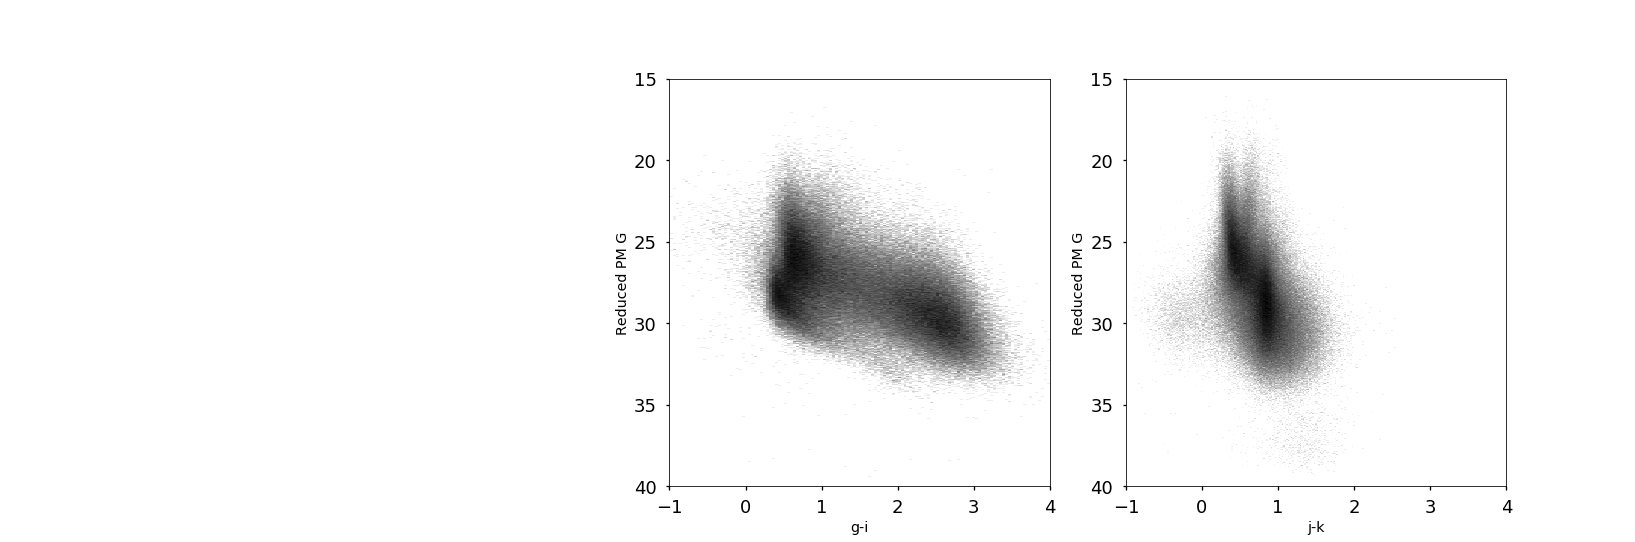

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15,7.5))
sdssgood = (np.abs(sdsscolor) < 10) & (sdsstbl['reduced_pm'] < 40) & (sdsstbl['reduced_pm'] > 0)
tmassgood = (np.abs(tmasscolor) < 10) & (tmasstbl['reduced_pm'] < 40) & (tmasstbl['reduced_pm'] > 0)
ax[0].hist2d(sdsscolor[sdssgood], sdsstbl['reduced_pm'][sdssgood], bins=500, cmap='Greys', norm=mpl.colors.LogNorm()) #, s=1, lw=0, alpha=0.5)
ax[0].set_ylim(40, 15)
ax[0].set_xlim(-1, 4)
ax[0].set_xlabel('g-i')
ax[0].set_ylabel('Reduced PM G')
#ax[0].colorbar()
ax[1].hist2d(tmasscolor[tmassgood], tmasstbl['reduced_pm'][tmassgood], bins=500, cmap='Greys', norm=mpl.colors.LogNorm())
#ax[1].colorbar()
ax[1].set_ylim(40, 15)
ax[1].set_xlim(-1, 4)
ax[1].set_xlabel('j-k')
ax[1].set_ylabel('Reduced PM G')
plt.savefig('reducedPM.pdf')

In [30]:
dustCoeff = {'B': 0.0,
             'V': 0.0,
             'g': 0.0,
             'r': 0.0,
             'i': 0.0,
             'J': 0.0,
             'H': 0.0,
             'K': 0.0,
             'G': 0.0}

In [31]:
sdsstbl['reduced_pm'] = sdsstbl['phot_g_mean_mag'] - sdssdust*dustCoeff['G'] + 5.*np.log10(sdsspm) + 5.
sdsscolor = sdsstbl['psfmag_g'] - sdssdust*dustCoeff['g'] - (sdsstbl['psfmag_i'] - sdssdust*dustCoeff['i'])

In [32]:
tmasstbl['reduced_pm'] = tmasstbl['phot_g_mean_mag'] - tmassdust*dustCoeff['G']+ 5.*np.log10(tmasspm) + 5.
tmasscolor = tmasstbl['j_m'] - tmassdust*dustCoeff['J']- (tmasstbl['k_m'] - tmassdust*dustCoeff['K'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


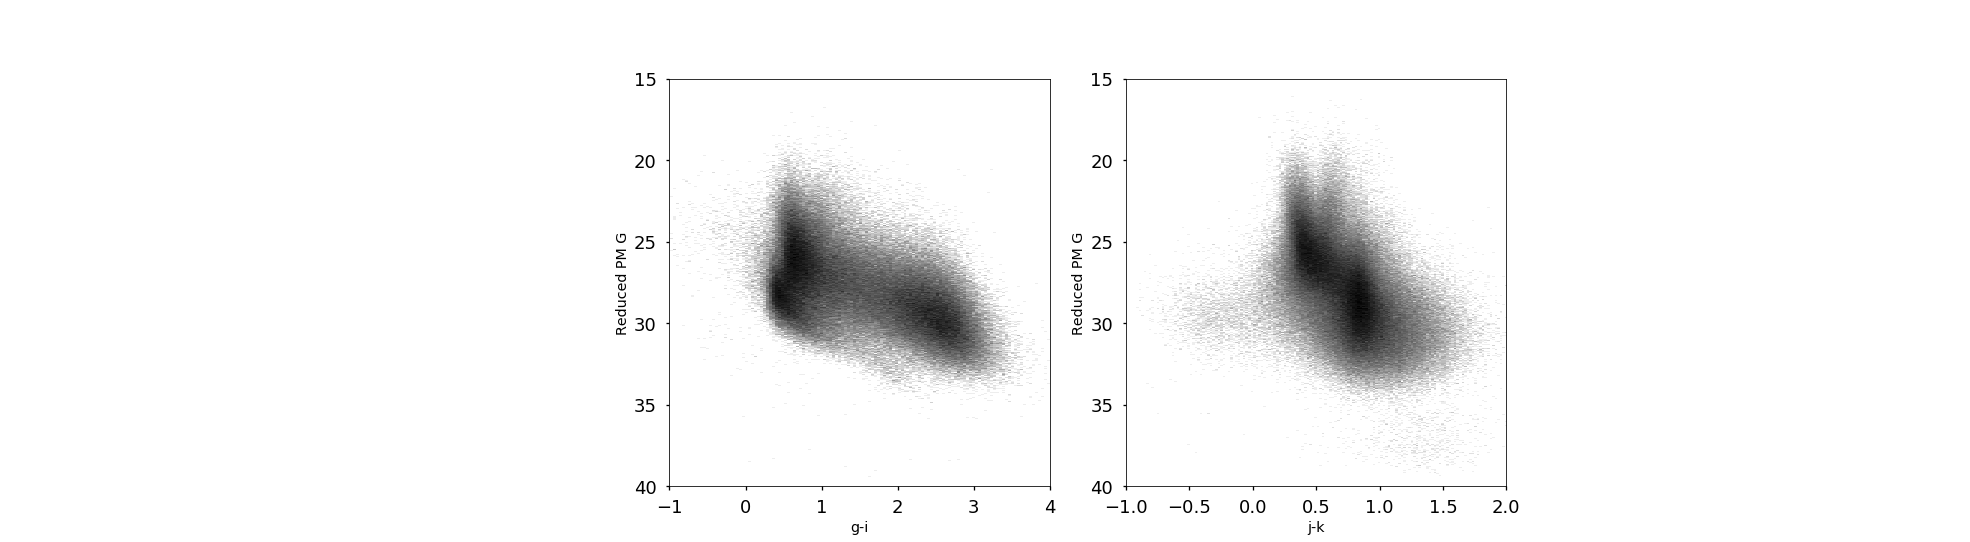

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15,7.5))
sdssgood = (np.abs(sdsscolor) < 10) & (sdsstbl['reduced_pm'] < 40) & (sdsstbl['reduced_pm'] > 0)
tmassgood = (np.abs(tmasscolor) < 10) & (tmasstbl['reduced_pm'] < 40) & (tmasstbl['reduced_pm'] > 0)
ax[0].hist2d(sdsscolor[sdssgood], sdsstbl['reduced_pm'][sdssgood], bins=500, cmap='Greys', norm=mpl.colors.LogNorm()) #, s=1, lw=0, alpha=0.5)
ax[0].set_ylim(40, 15)
ax[0].set_xlim(-1, 4)
ax[0].set_xlabel('g-i')
ax[0].set_ylabel('Reduced PM G')
#ax[0].colorbar()
ax[1].hist2d(tmasscolor[tmassgood], tmasstbl['reduced_pm'][tmassgood], bins=500, cmap='Greys', norm=mpl.colors.LogNorm())
#ax[1].colorbar()
ax[1].set_ylim(40, 15)
ax[1].set_xlim(-1, 2)
ax[1].set_xlabel('j-k')
ax[1].set_ylabel('Reduced PM G')
plt.savefig('reducedPM_nodustHalo.pdf')